<a href="https://colab.research.google.com/github/ben8169/Project/blob/main/2%EC%B0%A8_AI%E1%84%80%E1%85%B5%E1%84%89%E1%85%A1%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#바른 설치하기
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!uname -a
!dpkg -i bareun-linux.deb

#텐서플로우 설치
!curl -O https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz
!tar -C /opt/bareun -xzf libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz


#환경 설정하기
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

#API 키 등록. (바른 홈페이지에서 API를 미리 발급받아야 함.) 
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-T7GEKCI-HPDEKQI-SAIPJQQ-N5ATGNA

#pip 패키지 설치
!pip install -U bareunpy



Linux 8aa96e6220cc 5.15.107+ #1 SMP Sat Apr 29 09:15:28 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux
Selecting previously unselected package bareun.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (2.1.0) ...
Setting up bareun (2.1.0) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392M  100  392M    0     0   221M      0  0:00:01  0:00:01 --:--:--  221M
env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 

In [4]:
import sys
import bareunpy as brn
import google.protobuf.text_format as tf
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

API_KEY = "koba-T7GEKCI-HPDEKQI-SAIPJQQ-N5ATGNA"
t = brn.Tagger(API_KEY, "localhost", 5656)

In [5]:
with open("/content/drive/MyDrive/google.txt",'r') as f:
  google_titles = f.read().split('\n')
google_titles

["생각을 영화로 만드는 인공지능 시대 '성큼'",
 "구글 AI 챗봇 '바드'에게 인공지능도시 물었더니…“대한민국 인공지능 대표도시는 광주”",
 '남동발전, 인공지능 기반 입찰담합포착시스템 도입',
 '우리은행, 우리벤처파트너스·한국인공지능협회와 AI 산업 지원',
 '과기정통부, 인공지능 윤리·신뢰성 강화 추진',
 '남주헌 교수, 김기현 대표에게 "인공지능 시대, 중장기 국가 비전 전략" 강조',
 '[경향의 눈] 인공지능과 대화한 사람이 죽었다',
 "'인간과 AI: 보완인가 대체인가?'…중앙대, 내달 1·2일 ICAIH 2023 개최",
 '웹3와 인공지능은 결국 한 몸',
 "엔비디아, 'AI로 살아있는 NPC 만든다'",
 "'인공지능이 불러올 크고 작은 일상의 변화는'",
 '슈미트 전 구글 CEO “AI는 실존적 위험이다!, 인공지능이 많은 사람들 죽일 수 있을 것”',
 "육군본부-한국인공지능협회, '2023 AI 기반 국방 혁신 포럼' 성료..국방 분야 AI 기술 적용 위한 교류의 장",
 '인공지능의 편향성이 주는 리스크, 어떻게 줄이나',
 '왜 이런 결과가...인공지능(AI), 이제 설명도 해준다',
 '[특허뉴스] 미국 백악관, 책임감 있는 인공지능 혁신 위해 미국 주요기업 CEO들 회의',
 "탄소배출량 관리도 인공지능으로.... 오후두시랩, AI 기반 탄소중립 SaaS 플랫폼 '그린플로' 출시",
 '중국 경제발전, 인공지능(AI)이 주도한다',
 '배런스 "엔비디아 랠리 놓친 캐시 우드가 선택한 AI 수혜주는…."',
 "국방부, '국방인공지능센터' 창설 위한 국방AI센터추진단 출범",
 '인공지능 로봇시대를 대비한 국민통합 정책이 필요하다',
 '성숙한 인공지능을 기다리며',
 '미 백악관-CEO, 인공지능(AI) 위험성에 대해 논의하다',
 '제주도교육청, 인공지능시대 대비 교육정책 토론회 개최',
 '오픈AI “다시 오픈!” < 주간 인공지능 < 포커스 < 기사본문',
 '반도체 설계 전문 \'마블\' 16% 급등…키뱅크

In [6]:
k = [i.strip() for i in google_titles]

  #1.일반명사 추출 및 빈도집계
res = t.tags(k)        
m = res.msg()
pa = res.pos()
nng_list = [ x for x, y in pa if y == 'NNG']
print(nng_list) 

#2.추출된 명사의 빈도 집계 --> top 20 추출하여 확인
c_nng = Counter(nng_list)
sort_nng = []
for a, b in c_nng.items():
  sort_nng = sort_nng + [(b, a)]
sort_nng.sort(reverse=True)
print(sort_nng[:20])            


word = [ b for a, b in sort_nng[:20]]
freq = [ a for a, b in sort_nng[:20]]
pd.DataFrame( {'단어': word, '횟수': freq } )

newindex = [ i + 1 for i in range(20)]
print(pd.DataFrame( {'단어': word, '횟수': freq }, index=newindex))


['생각', '영화', '인공', '지능', '시대', '인공', '지능', '도시', '인공', '지능', '대표', '도시', '남동', '발전', '인공', '지능', '기반', '입찰', '담합', '포착', '시스템', '도입', '산업', '지원', '과기', '정통부', '인공', '지능', '윤리', '신뢰성', '강화', '추진', '교수', '대표', '인공', '지능', '시대', '중장기', '국가', '비전', '전략', '강조', '경향', '눈', '인공', '지능', '사람', '인간', '보완', '대체', '내달', 'ICAIH', '개최', '웹', '인공', '지능', '몸', 'NPC', '인공', '지능', '일상', '변화', '실존', '위험', '인공', '지능', '사람', '육군', '본부', '기반', '국방', '혁신', '포럼', '국방', '분야', '기술', '적용', '교류', '인공', '지능', '편향성', '리스크', '결과', '인공', '지능', '설명', '특허', '뉴스', '백악관', '책임감', '인공', '지능', '혁신', '주요', '기업', '회의', '탄소', '배출량', '관리', '인공', '지능', '기반', '탄소', '중립', 'SaaS', '플랫폼', '출시', '경제', '발전', '인공', '지능', '랠리', '수혜주', '국방부', '국방', '인공', '지능', '센터', '창설', '국방', '센터', '추진단', '출범', '인공', '지능', '로봇', '시대', '국민', '통합', '정책', '인공', '지능', '인공', '지능', '위험성', '인공', '지능', '시대', '대비', '교육', '정책', '토론회', '개최', '오픈', '오픈', '주간', '인공', '지능', '포커스', '기사', '본문', '반도체', '설계', '전문', '마블', '급등', '키', '뱅크', '수혜주', '목표', '인공', '지능', '기반', '

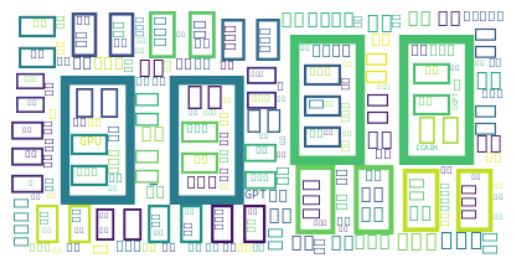

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

[0.08970438328236494, 0.08868501529051988, 0.012232415902140673, 0.010193679918450561, 0.00815494393476045, 0.00764525993883792, 0.007135575942915392, 0.0061162079510703364, 0.0061162079510703364, 0.0061162079510703364]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


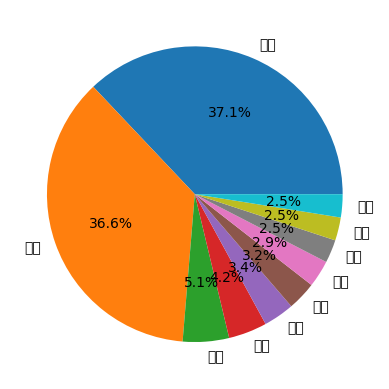

In [7]:
plt.rc('font', family='NanumBarunGothic')


# 3.워드클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic', background_color='white')
wordcloud.generate_from_frequencies(c_nng)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#4.상대빈도 추출 및 시각화
N = len(nng_list)
word_top10 = word[:10]
freq_top10 = freq[:10]
ratio = [i/N for i in freq_top10]
print(ratio)
plt.pie(ratio, labels = word_top10, autopct='%.1f%%')
plt.show()

감성분석

In [8]:
!pip install ratsnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.5/582.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.7 MB/s eta 0:00:00


In [9]:
import torch
from ratsnlp.nlpbook.classification import ClassificationTrainArguments
args = ClassificationTrainArguments(
    pretrained_model_name="beomi/kcbert-base",
    downstream_corpus_name="nsmc",
    downstream_model_dir="/content/drive/MyDrive",
    batch_size=32 if torch.cuda.is_available() else 4,
    learning_rate=5e-5,
    max_seq_length=128,
    epochs=10,
    tpu_cores=0 if torch.cuda.is_available() else 8,
    seed=7,
)

In [10]:
from ratsnlp import nlpbook
nlpbook.set_seed(args)

set seed: 7


In [11]:
nlpbook.set_logger(args)

INFO:ratsnlp:Training/evaluation parameters ClassificationTrainArguments(pretrained_model_name='beomi/kcbert-base', downstream_task_name='document-classification', downstream_corpus_name='nsmc', downstream_corpus_root_dir='/content/Korpora', downstream_model_dir='/content/drive/MyDrive', max_seq_length=128, save_top_k=1, monitor='min val_loss', seed=7, overwrite_cache=False, force_download=False, test_mode=False, learning_rate=5e-05, epochs=10, batch_size=32, cpu_workers=2, fp16=False, tpu_cores=0)
INFO:ratsnlp:Training/evaluation parameters ClassificationTrainArguments(pretrained_model_name='beomi/kcbert-base', downstream_task_name='document-classification', downstream_corpus_name='nsmc', downstream_corpus_root_dir='/content/Korpora', downstream_model_dir='/content/drive/MyDrive', max_seq_length=128, save_top_k=1, monitor='min val_loss', seed=7, overwrite_cache=False, force_download=False, test_mode=False, learning_rate=5e-05, epochs=10, batch_size=32, cpu_workers=2, fp16=False, tpu_c

말뭉치 다운로드

In [12]:
from Korpora import Korpora
Korpora.fetch(
    corpus_name=args.downstream_corpus_name,
    root_dir=args.downstream_corpus_root_dir,
    force_download=True,
)

[nsmc] download ratings_train.txt: 14.6MB [00:00, 74.9MB/s]                            
[nsmc] download ratings_test.txt: 4.90MB [00:00, 41.5MB/s]                            


토크나이저 준비

In [13]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(
    args.pretrained_model_name,
    do_lower_case=False,
)

In [14]:
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler
from ratsnlp.nlpbook.classification import NsmcCorpus, ClassificationDataset
corpus = NsmcCorpus()
train_dataset = ClassificationDataset(
    args=args,
    corpus=corpus,
    tokenizer=tokenizer,
    mode="train",
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=args.batch_size,
    sampler=RandomSampler(train_dataset, replacement=False),
    collate_fn=nlpbook.data_collator,
    drop_last=False,
    num_workers=args.cpu_workers,
)

INFO:ratsnlp:Creating features from dataset file at /content/Korpora/nsmc
INFO:ratsnlp:Creating features from dataset file at /content/Korpora/nsmc
INFO:ratsnlp:loading train data... LOOKING AT /content/Korpora/nsmc/ratings_train.txt
INFO:ratsnlp:loading train data... LOOKING AT /content/Korpora/nsmc/ratings_train.txt
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences [took 49.218 s]
INFO:ratsnlp:tokenize sentences [took 49.218 s]
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:sentence: 아 더빙.. 진짜 짜증나네요 목소리
INFO:ratsnlp:sentence: 아 더빙.. 진짜 짜증나네요 목소리
INFO:ratsnlp:tokens: [CLS] 아 더 ##빙 . . 진짜 짜증나네 ##요 목소리 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [15]:
val_dataset = ClassificationDataset(
    args=args,
    corpus=corpus,
    tokenizer=tokenizer,
    mode="test",
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=args.batch_size,
    sampler=SequentialSampler(val_dataset),
    collate_fn=nlpbook.data_collator,
    drop_last=False,
    num_workers=args.cpu_workers,
)


INFO:ratsnlp:Creating features from dataset file at /content/Korpora/nsmc
INFO:ratsnlp:Creating features from dataset file at /content/Korpora/nsmc
INFO:ratsnlp:loading test data... LOOKING AT /content/Korpora/nsmc/ratings_test.txt
INFO:ratsnlp:loading test data... LOOKING AT /content/Korpora/nsmc/ratings_test.txt
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences [took 9.383 s]
INFO:ratsnlp:tokenize sentences [took 9.383 s]
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:sentence: 굳 ㅋ
INFO:ratsnlp:sentence: 굳 ㅋ
INFO:ratsnlp:tokens: [CLS] 굳 ㅋ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [16]:
from transformers import BertConfig, BertForSequenceClassification
pretrained_model_config = BertConfig.from_pretrained(
    args.pretrained_model_name,
    num_labels=corpus.num_labels,
)

In [17]:
model = BertForSequenceClassification.from_pretrained(
        args.pretrained_model_name,
        config=pretrained_model_config,
)

Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initiali

In [18]:
from ratsnlp.nlpbook.classification import ClassificationTask
task = ClassificationTask(model, args) # 태스트의 정의

In [19]:
trainer = nlpbook.get_trainer(args) #트레이너의 정의

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


학습

In [ ]:
trainer.fit(
    task,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:608: UserWarning: Checkpoint directory /content/drive/MyDrive exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/optimizer.py:380: RuntimeWarning: Found unsupported keys in the optimizer configuration: {'scheduler'}
  rank_zero_warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                          | Params
--------------------------------------------------------
0 | model | BertF

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]